# Supervised Learning Project Part - 1

# Healthcare Domain

In [179]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline

## Import and warehouse data

In [180]:
#Importing Normal Dataset
dfNormal = pd.read_csv('Part1 - Normal.csv')
dfNormal.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [181]:
print("Shape of normal dataset : ",dfNormal.shape)

Shape of normal dataset :  (100, 7)


In [182]:
#Importing Type H Dataset
dfTypeH = pd.read_csv('Part1 - Type_H.csv')
dfTypeH.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [183]:
print("Shape of Type H dataset : ",dfTypeH.shape)

Shape of Type H dataset :  (60, 7)


In [184]:
#Importing Type H Dataset
dfTypeS = pd.read_csv('Part1 - Type_S.csv')
dfTypeS.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


#### Finding text variations in Class - Categorical variable

In [185]:
print("Shape of Type S dataset : ",dfTypeS.shape)

Shape of Type S dataset :  (150, 7)


In [186]:
#Getting unique values from Classs Column in Normal Dataset
dfNormal['Class'].unique()

array(['Normal', 'Nrmal'], dtype=object)

In [187]:
#Getting unique values from Classs Column in TypeH Dataset
dfTypeH['Class'].unique()

array(['Type_H', 'type_h'], dtype=object)

In [188]:
#Getting unique values from Classs Column in TypeS Dataset
dfTypeS['Class'].unique()

array(['Type_S', 'tp_s'], dtype=object)

In [189]:
# Generalizing Class column in Normal dataset
dfNormal['Class'].replace({"Nrmal": "Normal"}, inplace=True)
dfNormal['Class'].unique()

array(['Normal'], dtype=object)

In [190]:
# Generalizing Class column in Normal dataset
dfTypeH['Class'].replace({"type_h": "Type_H"}, inplace=True)
dfTypeH['Class'].unique()

array(['Type_H'], dtype=object)

In [191]:
# Generalizing Class column in Normal dataset
dfTypeS['Class'].replace({"tp_s": "Type_S"}, inplace=True)
dfTypeS['Class'].unique()

array(['Type_S'], dtype=object)

In [192]:
#Merging all datasets
mergedDF = pd.concat([dfNormal, dfTypeH, dfTypeS])
mergedDF.shape

(310, 7)

## Data cleansing

In [193]:
# Info about dataset 
mergedDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


In [194]:
#null check
mergedDF.isnull().any()

P_incidence    False
P_tilt         False
L_angle        False
S_slope        False
P_radius       False
S_Degree       False
Class          False
dtype: bool

In [195]:
mergedDF.dtypes.to_frame(name = 'Data Type')

,Data Type
P_incidence,float64
P_tilt,float64
L_angle,float64
S_slope,float64
P_radius,float64
S_Degree,float64
Class,object


In [196]:
mergedDF['Class'] = mergedDF.Class.astype('category')

In [197]:
mergedDF.groupby(['Class']).count()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
Class,,,,,,
Normal,100,100,100,100,100,100
Type_H,60,60,60,60,60,60
Type_S,150,150,150,150,150,150


In [198]:
mergedDF.dtypes.to_frame(name = 'Data Type')

,Data Type
P_incidence,float64
P_tilt,float64
L_angle,float64
S_slope,float64
P_radius,float64
S_Degree,float64
Class,category


In [199]:
mergedDF.shape

(310, 7)

In [200]:
mergedDF.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


## Data analysis & visualisation

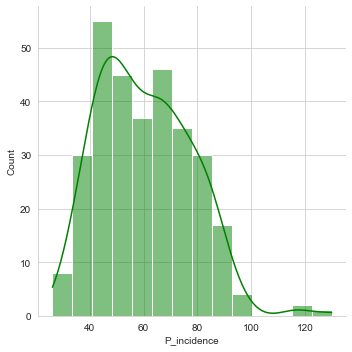

Skew of P_incidence 0.5204398948625641


In [201]:
# Distribution of P_incidence
sns.set_style("whitegrid")
sns.displot(mergedDF.P_incidence, kde = True, color ='green')
plt.show()
print("Skew of P_incidence " + str(mergedDF.P_incidence.skew()))

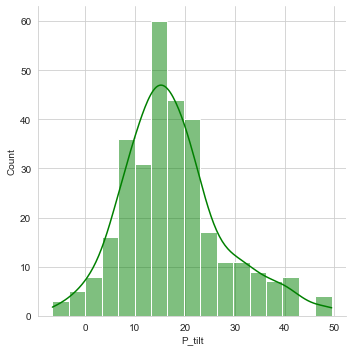

Skew of P_tilt 0.6765533590425814


In [202]:
# Distribution of P_tilt
sns.displot(mergedDF.P_tilt, kde = True, color ='green')
plt.show()
print("Skew of P_tilt " + str(mergedDF.P_tilt.skew()))

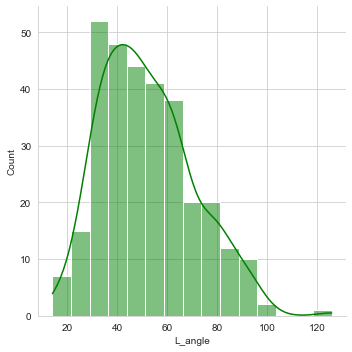

Skew of L_angle 0.599451477593938


In [203]:
# Distribution of L_angle
sns.displot(mergedDF.L_angle, kde = True, color ='green')
plt.show()
print("Skew of L_angle " + str(mergedDF.L_angle.skew()))

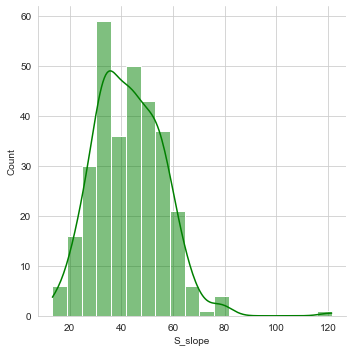

Skew of S_slope 0.7925766941630666


In [204]:
# Distribution of S_slope
sns.displot(mergedDF.S_slope, kde = True, color ='green')
plt.show()
print("Skew of S_slope " + str(mergedDF.S_slope.skew()))

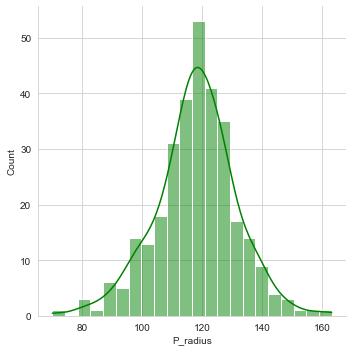

Skew of P_radius -0.17683486805356013


In [205]:
# Distribution of P_radius
sns.displot(mergedDF.P_radius, kde = True, color ='green')
plt.show()
print("Skew of P_radius " + str(mergedDF.P_radius.skew()))

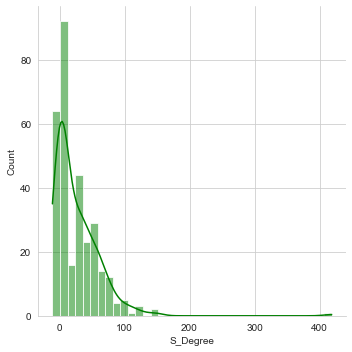

Skew of S_Degree 4.317953644012237


In [206]:
# Distribution of S_Degree
sns.displot(mergedDF.S_Degree, kde = True, color ='green')
plt.show()
print("Skew of S_Degree " + str(mergedDF.S_Degree.skew()))

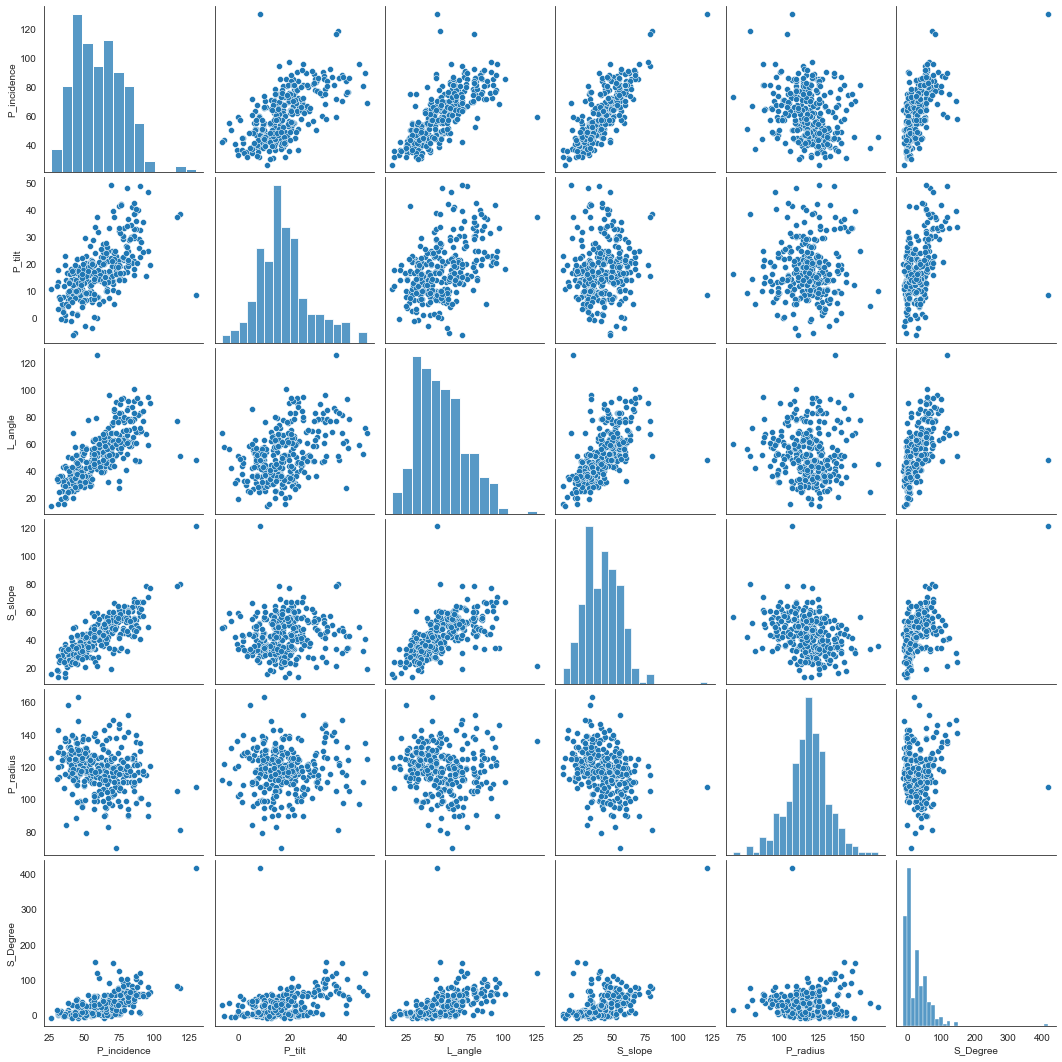

In [207]:
#Bivariate relationships of fields
sns.set_style("white")
sns.pairplot(mergedDF)
plt.show()

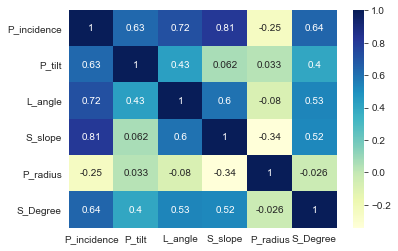

In [208]:
# Plotting the correlation heat map to understand the correlation between variables
sns.heatmap(mergedDF.corr(), annot=True, cmap="YlGnBu")
plt.show()

## Model training, testing and tuning

## KNN

In [209]:
#Creating a dataframe with only independent attributes
x = mergedDF.drop(labels= "Class", axis = 1)
y = mergedDF["Class"]
x.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910


## Scaling Datasets

In [210]:
# Converting the attributes to Z scores since units are not known
XScaled = x.apply(zscore)
XScaled.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,8.702716e-17,1.001617,-1.996010,-0.817398,-0.104925,0.719464,4.029206
P_tilt,310.0,2.326096e-16,1.001617,-2.411664,-0.688114,-0.118606,0.458116,3.191402
L_angle,310.0,1.980495e-16,1.001617,-2.047652,-0.806027,-0.127862,0.597549,3.984615
S_slope,310.0,5.121351e-17,1.001617,-2.207741,-0.716842,-0.040960,0.726941,5.855771
P_radius,310.0,-6.274551e-16,1.001617,-3.597963,-0.542383,0.026138,0.567621,3.395818
S_Degree,310.0,-8.156558e-17,1.001617,-0.996172,-0.658507,-0.387450,0.399768,10.460350


In [211]:
# Split X and y into training and test data set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=1)

In [212]:
# Building KNN model
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [213]:
# Calling Nearest Neighbour algorithm

NNH.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [214]:
# Evaluating performance of KNN model
# For every test data point, prediction happens based on 5 nearest neighbours in KNN model.

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.7526881720430108

In [215]:
pred = NNH.predict(X_test)

In [216]:
def rightly_identified(actual, predictions):
    a = pd.DataFrame()  # empty dataframe

    for i in np.sort(actual.unique()):
        try:  # because we get a key error if we use value_counts()[i] when the given class i does not exist in the value_count() array
            a.loc[i,'total_instances'] = len(actual[actual == i]) # value count of a given class i
            a.loc[i, 'identified_right'] = pd.Series(predictions[actual == i]).value_counts()[i] # number of instances where a given class i was identified correctly
            a.loc[i, '%'] = round(100*pd.Series(predictions[actual == i]).value_counts()[i]/len(actual[actual == i]), 1)  # percentage of predictions that were correct for a given class
        except:  # if the key error discussed above occurs, assign the percentage = 0
            a.loc[i, '%'] = 0.0
    return a

In [217]:
pred_vs_actual_knn = rightly_identified(y_test, pred)
pred_vs_actual_knn

,total_instances,identified_right,%
Normal,28.0,17.0,60.7
Type_H,17.0,11.0,64.7
Type_S,48.0,42.0,87.5


<AxesSubplot:>

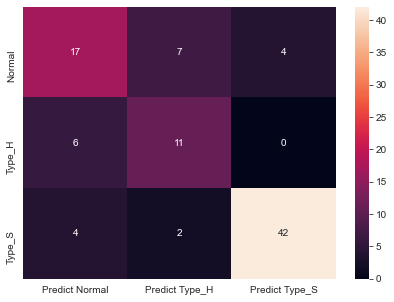

In [218]:
cm=metrics.confusion_matrix(y_test, pred, labels=["Normal","Type_H", "Type_S"])

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal","Type_H", "Type_S"]],
                  columns = [i for i in ["Predict Normal","Predict Type_H", "Predict Type_S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [219]:
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))

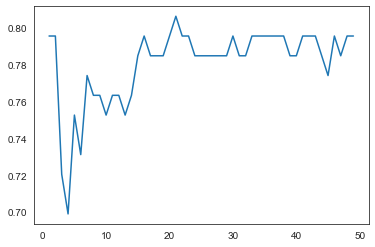

In [220]:
plt.plot(range(1,50),scores)

## Conclusion and improvisation

- Problem statement is to design and train a KNN classifier
- It has 75% accuracy as per the operations done on data
- This could have been shown a better resultsor can be concluded on comparing the results of different classifier techniques

Dataset had less impurities

Observations:
- Class variable represented same values in 2 different notaionswhich had to be cleaned up and converted as categorical variable. 